In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
model = models.load_model("C:\\Sumit\\sumit\\SIH\\Plant Disease\\models\\final_model.h5")

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0     

In [4]:
IMAGE_SIZE = 224
BATCH_SIZE = 50
CHANNELS = 3
EPOCHS = 30

In [5]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    ".\\dataset\\valid",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 17572 files belonging to 38 classes.


In [6]:
class_names = dataset.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [7]:
train_dataset = dataset.take(300)
valid_dataset = dataset.skip(300)

test_dataset = valid_dataset.take(25)
valid_dataset = valid_dataset.skip(25)

In [8]:
train_dataset = train_dataset.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = valid_dataset.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(200).prefetch(buffer_size=tf.data.AUTOTUNE)

first image to predict
first image's actual label:  Soybean___healthy
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
predicted label:  Blueberry___healthy


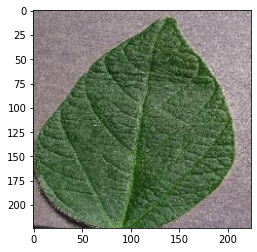

In [55]:
for images_batch, labels_batch in test_dataset.take(1):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    if(class_names[first_label] == class_names[np.argmax(batch_prediction[0])]):
        print("Right Prediction")

In [49]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                fill_mode='nearest')

valid_gen=ImageDataGenerator(rescale=1./255)

batch_size=50
base_dir=".\\dataset"

training_set=train_datagen.flow_from_directory(base_dir+'/train',
                                              target_size=(224,224),
                                              batch_size=batch_size,
                                              class_mode='categorical')

valid_set=valid_gen.flow_from_directory(base_dir+'/valid',
                                              target_size=(224,224),
                                              batch_size=batch_size,
                                              class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [50]:
model.evaluate(valid_set)

352/352 [==============================] - 2264s 6s/step - loss: 0.1304 - accuracy: 0.9558


[0.13037444651126862, 0.9557819366455078]

In [51]:
model.save(f"../models/vgg_model(sajal)")

INFO:tensorflow:Assets written to: ../models/vgg_model(sajal)\assets


In [33]:
new_model = tf.keras.models.load_model('../models/cnn_model(sumit)')

first image to predict
first image's actual label:  Grape___Black_rot
[3.7637219e-06 5.6956091e-05 4.1303265e-06 6.0461987e-09 8.0950455e-09
 4.3991244e-10 8.2776608e-13 1.6715770e-10 4.1686612e-11 1.0604650e-12
 6.4291486e-21 9.9093342e-01 3.8084290e-06 4.6675666e-07 4.3002763e-03
 6.6197638e-12 3.4727436e-06 4.4604476e-10 3.9052018e-05 1.4869626e-08
 3.6555665e-11 2.5039262e-07 2.4301398e-11 4.2127404e-12 5.4672544e-10
 3.0283014e-14 2.9298365e-12 2.3866719e-14 8.5190829e-04 3.3209207e-03
 8.3324387e-09 1.7777828e-07 2.0793894e-04 2.0284720e-11 2.7327114e-04
 6.9415037e-08 6.9796821e-13 2.6558768e-13]
predicted label:  Grape___Black_rot
Right Prediction
first image to predict
first image's actual label:  Potato___Late_blight
[3.74535421e-06 2.50438774e-07 8.21670554e-08 9.52991551e-14
 8.01740998e-13 1.83121411e-08 7.48043339e-21 5.36700107e-09
 3.04911769e-14 2.12665241e-09 1.61153850e-18 3.85646506e-12
 4.28922739e-12 8.50749569e-16 8.70009468e-13 2.06777511e-16
 2.93107960e-09 6.0

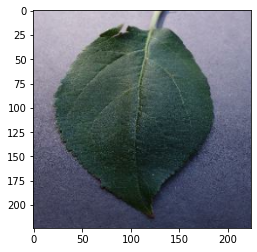

In [47]:
for images_batch, labels_batch in test_dataset.take(10):
    first_image = (images_batch[0].numpy().astype('uint8'))
    first_label = labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label: ", class_names[first_label])
    
    batch_prediction = new_model.predict(images_batch)
    print(batch_prediction[0])
    print("predicted label: ", class_names[np.argmax(batch_prediction[0])])
    if(class_names[first_label] == class_names[np.argmax(batch_prediction[0])]):
        print("Right Prediction")

In [37]:
new_model.evaluate(dataset.take(200))

200/200 [==============================] - 110s 547ms/step - loss: 0.2328 - accuracy: 0.9286


[0.23280468583106995, 0.928600013256073]

In [41]:
len(valid_set)

352